# Importação das bases de dados

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.close("all")

clientes = pd.read_csv("dados_clientes_vc.csv" , delimiter = ",")
transacoes = pd.read_csv("dados_transacoes_vc.csv" , delimiter = ",")

# Visualização de DataFrame

In [3]:
display(clientes)

,ID_PESSOA,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA
0,359514,4,DIAMANTE,0.34,2020-06-08
1,508094,5,DIAMANTE+,0.68,2020-06-08
2,325898,5,DIAMANTE+,3.14,2020-06-08
3,508457,5,DIAMANTE+,0.85,2020-06-08
4,523322,3,OURO,208.97,2020-06-21
...,...,...,...,...,...
245989,433299,1,AZUL,0.96,2000-09-14
245990,427667,1,AZUL,0.80,2000-09-13
245991,302099,1,AZUL,0.10,2000-09-22
245992,480290,1,AZUL,0.66,2000-06-28


In [4]:
display(transacoes)

,ID_PESSOA,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,CARTAO_PRESENTE,PEDIDO,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,UNIDADE
0,529423,CREDITO,CREDITO_POR_TROCO,32914639,0,0.37,0.37,BRL,2019-11-03,434
1,222092,CREDITO,CREDITO_POR_TROCO,32914639,0,0.39,3.20,BRL,2017-11-20,444
2,476858,CREDITO,CREDITO_POR_TROCO,32914639,0,1.15,1.15,BRL,2020-08-05,427
3,366849,CREDITO,CREDITO_POR_TROCO,32914639,0,0.15,2.66,BRL,2017-08-20,434
4,406837,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.50,0.00,BRL,2017-08-08,443
...,...,...,...,...,...,...,...,...,...,...
380319,256081,CREDITO,CREDITO_POR_TROCO,32914639,0,0.90,0.90,BRL,2018-02-15,439
380320,215850,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.20,0.75,BRL,2018-12-06,422
380321,418560,CREDITO,CREDITO_POR_TROCO,32914639,0,0.23,0.47,BRL,2018-11-27,427
380322,425635,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,32914639,0,85.00,88.35,BRL,2020-10-03,446


# Tratamento de dados

In [ ]:
# Convertendo DT_MUDANCA_PEDRA para datetime e separando em ano e mes
# Convertendo DATA_DA_MOVIMENTACAO para datetime e separando em ano e mes
# Para poder agrupar as informações em um espaço mair de tempo

In [5]:
clientes['DT_MUDANCA_PEDRA'] = pd.to_datetime(clientes['DT_MUDANCA_PEDRA'])
clientes['ANO'] = clientes['DT_MUDANCA_PEDRA'].dt.year
clientes['MES'] = clientes['DT_MUDANCA_PEDRA'].dt.month
display(clientes[['DT_MUDANCA_PEDRA','ANO','MES']])

,DT_MUDANCA_PEDRA,ANO,MES
0,2020-06-08,2020,6
1,2020-06-08,2020,6
2,2020-06-08,2020,6
3,2020-06-08,2020,6
4,2020-06-21,2020,6
...,...,...,...
245989,2000-09-14,2000,9
245990,2000-09-13,2000,9
245991,2000-09-22,2000,9
245992,2000-06-28,2000,6


In [6]:
transacoes['DATA_DA_MOVIMENTACAO'] = pd.to_datetime(transacoes['DATA_DA_MOVIMENTACAO'])
transacoes['ANO'] = transacoes['DATA_DA_MOVIMENTACAO'].dt.year
transacoes['MES'] = transacoes['DATA_DA_MOVIMENTACAO'].dt.month
display(transacoes[['DATA_DA_MOVIMENTACAO','ANO','MES']])

,DATA_DA_MOVIMENTACAO,ANO,MES
0,2019-11-03,2019,11
1,2017-11-20,2017,11
2,2020-08-05,2020,8
3,2017-08-20,2017,8
4,2017-08-08,2017,8
...,...,...,...
380319,2018-02-15,2018,2
380320,2018-12-06,2018,12
380321,2018-11-27,2018,11
380322,2020-10-03,2020,10


In [7]:
# Criando uma novo coluna para ano e mes nas transações usando lambda para converter em string e separar
#transacoes['ANO'] = transacoes['DATA_DA_MOVIMENTACAO'].apply(lambda x: str(x)[:4])
#transacoes['MES'] = transacoes['DATA_DA_MOVIMENTACAO'].apply(lambda x: str(x)[5:7])
#display(transacoes[['DATA_DA_MOVIMENTACAO','ANO','MES']])

In [ ]:
# Fazendo o join das duas tabelas para encontrar o valor medio de transação por Nivel
# Assim podendo utilizar a relação das duas tabelas e complementar informações que podem faltar na outra
# Alem de relacionar os dados das duas tabelas e conseguir informações mais refinadas

In [8]:
l_join_Nivel_transacoes = pd.merge(transacoes, clientes, how = "left", on = 'ID_PESSOA')
display(l_join_Nivel_transacoes)

,ID_PESSOA,DEBITO_OU_CREDITO,TIPO_TRANSACAO_VC,CARTAO_PRESENTE,PEDIDO,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,UNIDADE,ANO_x,MES_x,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA,ANO_y,MES_y
0,529423,CREDITO,CREDITO_POR_TROCO,32914639,0,0.37,0.37,BRL,2019-11-03,434,2019,11,3.0,OURO,0.08,2019-02-06,2019.0,2.0
1,222092,CREDITO,CREDITO_POR_TROCO,32914639,0,0.39,3.20,BRL,2017-11-20,444,2017,11,4.0,DIAMANTE,1.15,2016-07-05,2016.0,7.0
2,476858,CREDITO,CREDITO_POR_TROCO,32914639,0,1.15,1.15,BRL,2020-08-05,427,2020,8,5.0,DIAMANTE+,0.00,2020-05-13,2020.0,5.0
3,366849,CREDITO,CREDITO_POR_TROCO,32914639,0,0.15,2.66,BRL,2017-08-20,434,2017,8,2.0,PRATA,2.31,2020-10-26,2020.0,10.0
4,406837,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.50,0.00,BRL,2017-08-08,443,2017,8,4.0,DIAMANTE,120.94,2016-10-09,2016.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400177,256081,CREDITO,CREDITO_POR_TROCO,32914639,0,0.90,0.90,BRL,2018-02-15,439,2018,2,NaN,NaN,NaN,NaT,NaN,NaN
400178,215850,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.20,0.75,BRL,2018-12-06,422,2018,12,3.0,OURO,97.78,2020-10-12,2020.0,10.0
400179,418560,CREDITO,CREDITO_POR_TROCO,32914639,0,0.23,0.47,BRL,2018-11-27,427,2018,11,5.0,DIAMANTE+,85.25,2018-09-01,2018.0,9.0
400180,425635,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,32914639,0,85.00,88.35,BRL,2020-10-03,446,2020,10,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
# Separando o Dataframes l_join_Nivel_transacoes em transacoes_credito e transacoes_debito para melhor visualização por tipo de transação

In [44]:
transacoes_credito = l_join_Nivel_transacoes[l_join_Nivel_transacoes['DEBITO_OU_CREDITO'] == 'CREDITO']
transacoes_credito.rename(columns={'DEBITO_OU_CREDITO': 'CREDITO'}, inplace = True)
display(transacoes_credito)

C:\Users\x_ped\AppData\Local\Temp\ipykernel_20704\3595638448.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacoes_credito.rename(columns={'DEBITO_OU_CREDITO': 'CREDITO'}, inplace = True)


,ID_PESSOA,CREDITO,TIPO_TRANSACAO_VC,CARTAO_PRESENTE,PEDIDO,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,UNIDADE,ANO_x,MES_x,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA,ANO_y,MES_y
0,529423,CREDITO,CREDITO_POR_TROCO,32914639,0,0.37,0.37,BRL,2019-11-03,434,2019,11,3.0,OURO,0.08,2019-02-06,2019.0,2.0
1,222092,CREDITO,CREDITO_POR_TROCO,32914639,0,0.39,3.20,BRL,2017-11-20,444,2017,11,4.0,DIAMANTE,1.15,2016-07-05,2016.0,7.0
2,476858,CREDITO,CREDITO_POR_TROCO,32914639,0,1.15,1.15,BRL,2020-08-05,427,2020,8,5.0,DIAMANTE+,0.00,2020-05-13,2020.0,5.0
3,366849,CREDITO,CREDITO_POR_TROCO,32914639,0,0.15,2.66,BRL,2017-08-20,434,2017,8,2.0,PRATA,2.31,2020-10-26,2020.0,10.0
5,372327,CREDITO,DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC,32914639,0,38.20,38.20,BRL,2019-03-25,458,2019,3,NaN,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400176,516495,CREDITO,CREDITO_POR_TROCO,32914639,0,0.10,4.67,BRL,2020-02-18,431,2020,2,NaN,NaN,NaN,NaT,NaN,NaN
400177,256081,CREDITO,CREDITO_POR_TROCO,32914639,0,0.90,0.90,BRL,2018-02-15,439,2018,2,NaN,NaN,NaN,NaT,NaN,NaN
400179,418560,CREDITO,CREDITO_POR_TROCO,32914639,0,0.23,0.47,BRL,2018-11-27,427,2018,11,5.0,DIAMANTE+,85.25,2018-09-01,2018.0,9.0
400180,425635,CREDITO,CREDITO_GERADO_POR_COMPRA_DE_VC,32914639,0,85.00,88.35,BRL,2020-10-03,446,2020,10,NaN,NaN,NaN,NaT,NaN,NaN


In [46]:
transacoes_debito = l_join_Nivel_transacoes[l_join_Nivel_transacoes['DEBITO_OU_CREDITO'] == 'DEBITO']
transacoes_debito.rename(columns={'DEBITO_OU_CREDITO': 'DEBITO'}, inplace = True)
display(transacoes_debito)

C:\Users\x_ped\AppData\Local\Temp\ipykernel_20704\3037910983.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transacoes_debito.rename(columns={'DEBITO_OU_CREDITO': 'DEBITO'}, inplace = True)


,ID_PESSOA,DEBITO,TIPO_TRANSACAO_VC,CARTAO_PRESENTE,PEDIDO,VALOR_MOVIMENTADO,SALDO,MOEDA,DATA_DA_MOVIMENTACAO,UNIDADE,ANO_x,MES_x,IDNIVEL,DESCRICAO_NIVEL,SALDO_VC,DT_MUDANCA_PEDRA,ANO_y,MES_y
4,406837,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.50,0.00,BRL,2017-08-08,443,2017,8,4.0,DIAMANTE,120.94,2016-10-09,2016.0,10.0
6,338333,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,32914639,0,-2.06,0.00,BRL,2020-06-09,421,2020,6,4.0,DIAMANTE,0.00,2019-12-14,2019.0,12.0
7,338333,DEBITO,DEBITO_AUTOMATICO_PAG_PRESTACOES,32914639,0,-2.06,0.00,BRL,2020-06-09,421,2020,6,3.0,OURO,0.87,2020-05-02,2020.0,5.0
8,382902,DEBITO,DEBITO_COMPRA_COM_VC,32914639,0,-1.25,0.00,BRL,2018-02-16,429,2018,2,3.0,OURO,2.36,2020-05-18,2020.0,5.0
12,442096,DEBITO,DEBITO_COMPRA_COM_VC,32914639,0,-4.50,6.89,BRL,2020-05-14,450,2020,5,5.0,DIAMANTE+,3.30,2014-10-06,2014.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400170,206380,DEBITO,DEBITO_COMPRA_COM_VC,32914639,0,-2.50,0.72,BRL,2019-11-06,434,2019,11,4.0,DIAMANTE,0.00,2017-03-22,2017.0,3.0
400171,342902,DEBITO,DEBITO_COMPRA_COM_VC,32914639,87783681,-9.85,0.00,BRL,2019-09-17,420,2019,9,NaN,NaN,NaN,NaT,NaN,NaN
400172,357630,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-0.67,6.63,BRL,2017-03-08,432,2017,3,5.0,DIAMANTE+,0.00,2020-09-23,2020.0,9.0
400173,239736,DEBITO,DEBITO_PAGAMENTO_COM_VC,32914639,0,-1.20,0.26,BRL,2018-02-28,427,2018,2,4.0,DIAMANTE,0.00,2017-06-12,2017.0,6.0


# Estatisticas Basicas

In [ ]:
# criação de estatisticas bsicas para a visualização de informações e que podem ser utilizadas para criar visualizações Graficas 
# ou ser exportada e utilizada de outras formas ou por outras ferramentas

In [17]:
# quantidade de usuarios por nivel
quant_nivel = clientes[['IDNIVEL','DESCRICAO_NIVEL','ID_PESSOA']].groupby(['IDNIVEL','DESCRICAO_NIVEL']).count()
quant_nivel.sort_values(by='IDNIVEL')
display(quant_nivel)

,,ID_PESSOA
IDNIVEL,DESCRICAO_NIVEL,
1,AZUL,40916
2,PRATA,28195
3,OURO,46692
4,DIAMANTE,73870
5,DIAMANTE+,56321


In [12]:
# total dos tipos diferentes de transações
quant_tipo_pagamento = transacoes[['DEBITO_OU_CREDITO','ID_PESSOA']].groupby(['DEBITO_OU_CREDITO']).count()
display(quant_tipo_pagamento)

,ID_PESSOA
DEBITO_OU_CREDITO,
CREDITO,268698
DEBITO,111626


In [47]:
# media do valor dos tipos diferentes de transações 
quant_media_pagamento = transacoes[['DEBITO_OU_CREDITO','VALOR_MOVIMENTADO']].groupby('DEBITO_OU_CREDITO').mean()
# Arredondando os valores para melhor entendimento
quant_media_pagamento = np.round(quant_media_pagamento[['VALOR_MOVIMENTADO']], decimals = 2)
display(quant_media_pagamento)

,VALOR_MOVIMENTADO
DEBITO_OU_CREDITO,
CREDITO,22.41
DEBITO,-52.12


In [19]:
# quantidade por tipos diferentes de transações
quant_tipo_pagamento = transacoes[['DEBITO_OU_CREDITO','TIPO_TRANSACAO_VC','ID_PESSOA']].groupby(['DEBITO_OU_CREDITO','TIPO_TRANSACAO_VC']).count()
display(quant_tipo_pagamento)

ID_PESSOA
DEBITO_OU_CREDITO TIPO_TRANSACAO_VC                                     
CREDITO           AJUSTE_CONTABIL_OU_LANCAM_INCORRETO                368
                  AJUSTE_LANCAMENTO_INCORRETO                         15
                  CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO             52
                  CREDITO_GERADO_DEVOLUCAO_COMPRAS                   156
                  CREDITO_GERADO_POR_COMPRA_DE_VC                  24056
                  CREDITO_POR_COMPRA_LISTA_PRESENTES                6803
                  CREDITO_POR_TROCO                               234875
                  CREDITO_PREMIACAO_FUNCIONARIO                      697
                  CREDITO_PREMIACAO_GERENCIAL_CLIENTES               615
                  DEBITO_DEVOLUCAO_COMPRA_DE_VC                        6
                  DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC              1004
                  DEBITO_ESTORNO_TROCO                                 1
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL                  36
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP         14
DEBITO            AJUSTE_CONTABIL_OU_LANCAM_INCORRETO                  1
                  DEBITO_AUTOMATICO_PAG_PRESTACOES                 22119
                  DEBITO_COMPRA_COM_VC                             32591
                  DEBITO_DEVOLUCAO_COMPRA_DE_VC                       19
                  DEBITO_DUPLICIDADE_LANCAMENTO                        1
                  DEBITO_ESTORNO_LISTA_PRESENTES                      16
                  DEBITO_PAGAMENTO_COM_VC                          56800
                  DEBITO_POR_ESTORNO_TROCO                            16
                  DOACAO                                               1
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL                  43
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP         19

In [20]:
# media por tipos diferentes de transações
media_valor_tipo_pagamento = transacoes[['DEBITO_OU_CREDITO','TIPO_TRANSACAO_VC','VALOR_MOVIMENTADO']].groupby(['DEBITO_OU_CREDITO','TIPO_TRANSACAO_VC']).mean()
# Arredondando os valores para melhor entendimento
media_valor_tipo_pagamento = np.round(media_valor_tipo_pagamento[['VALOR_MOVIMENTADO']], decimals = 2)
display(media_valor_tipo_pagamento)

VALOR_MOVIMENTADO
DEBITO_OU_CREDITO TIPO_TRANSACAO_VC                                             
CREDITO           AJUSTE_CONTABIL_OU_LANCAM_INCORRETO                     102.46
                  AJUSTE_LANCAMENTO_INCORRETO                             103.92
                  CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO                 244.34
                  CREDITO_GERADO_DEVOLUCAO_COMPRAS                        137.46
                  CREDITO_GERADO_POR_COMPRA_DE_VC                         188.31
                  CREDITO_POR_COMPRA_LISTA_PRESENTES                      136.38
                  CREDITO_POR_TROCO                                         0.76
                  CREDITO_PREMIACAO_FUNCIONARIO                           129.38
                  CREDITO_PREMIACAO_GERENCIAL_CLIENTES                     43.28
                  DEBITO_DEVOLUCAO_COMPRA_DE_VC                            82.93
                  DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC                    161.36
                  DEBITO_ESTORNO_TROCO                                     20.24
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL                      365.43
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP            1414.21
DEBITO            AJUSTE_CONTABIL_OU_LANCAM_INCORRETO                     -65.00
                  DEBITO_AUTOMATICO_PAG_PRESTACOES                       -130.53
                  DEBITO_COMPRA_COM_VC                                    -51.15
                  DEBITO_DEVOLUCAO_COMPRA_DE_VC                          -212.45
                  DEBITO_DUPLICIDADE_LANCAMENTO                           -61.22
                  DEBITO_ESTORNO_LISTA_PRESENTES                         -260.00
                  DEBITO_PAGAMENTO_COM_VC                                 -21.28
                  DEBITO_POR_ESTORNO_TROCO                                -15.70
                  DOACAO                                                  -10.00
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL                     -425.57
                  TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP           -1467.95

In [21]:
# Quantidade de transações por unidade, por tipo de transação
quant_data_tipo_pagamento = transacoes[['DEBITO_OU_CREDITO','UNIDADE','ID_PESSOA']].groupby(['UNIDADE','DEBITO_OU_CREDITO']).count()
display(quant_data_tipo_pagamento)

ID_PESSOA
UNIDADE DEBITO_OU_CREDITO           
420     CREDITO                 1489
        DEBITO                   796
421     CREDITO                   17
        DEBITO                 22119
422     CREDITO                11190
...                              ...
468     DEBITO                    96
469     CREDITO                 4531
        DEBITO                  1003
470     CREDITO                   54
        DEBITO                    10

[101 rows x 1 columns]

In [22]:
# Distribuição de valores de debito e credito por mes 
quant_mes_tipo_transacao = transacoes[['DEBITO_OU_CREDITO','MES','VALOR_MOVIMENTADO']].groupby(['MES','DEBITO_OU_CREDITO']).sum()
display(quant_mes_tipo_transacao)

VALOR_MOVIMENTADO
MES DEBITO_OU_CREDITO                   
1   CREDITO                    527397.85
    DEBITO                    -505932.65
2   CREDITO                    547424.97
    DEBITO                    -570946.44
3   CREDITO                    493505.30
    DEBITO                    -513040.00
4   CREDITO                    242798.71
    DEBITO                    -303399.56
5   CREDITO                    328218.20
    DEBITO                    -311031.26
6   CREDITO                    301008.97
    DEBITO                    -271309.80
7   CREDITO                    488968.21
    DEBITO                    -423352.75
8   CREDITO                    671457.12
    DEBITO                    -633688.94
9   CREDITO                    761413.87
    DEBITO                    -691327.63
10  CREDITO                    744227.93
    DEBITO                    -718083.79
11  CREDITO                    426295.75
    DEBITO                    -393890.80
12  CREDITO                    489871.23
    DEBITO                    -481640.86

In [23]:
# Realizando um groupby para relacionar as movimentações com o nivel dos clientes
valor_media_nivel_por_transacoes = l_join_Nivel_transacoes[['IDNIVEL','DESCRICAO_NIVEL','DEBITO_OU_CREDITO','VALOR_MOVIMENTADO']].groupby(['IDNIVEL','DESCRICAO_NIVEL','DEBITO_OU_CREDITO']).mean()
# somente ordenando os niveis
valor_media_nivel_por_transacoes = valor_media_nivel_por_transacoes.sort_values(by='IDNIVEL')
display(valor_media_nivel_por_transacoes)

VALOR_MOVIMENTADO
IDNIVEL DESCRICAO_NIVEL DEBITO_OU_CREDITO                   
1.0     AZUL            CREDITO                    27.984981
                        DEBITO                    -54.515152
2.0     PRATA           CREDITO                    25.387212
                        DEBITO                    -52.880646
3.0     OURO            CREDITO                    26.988562
                        DEBITO                    -56.574185
4.0     DIAMANTE        CREDITO                    26.371667
                        DEBITO                    -56.391061
5.0     DIAMANTE+       CREDITO                    26.809886
                        DEBITO                    -52.930207

# Graficos

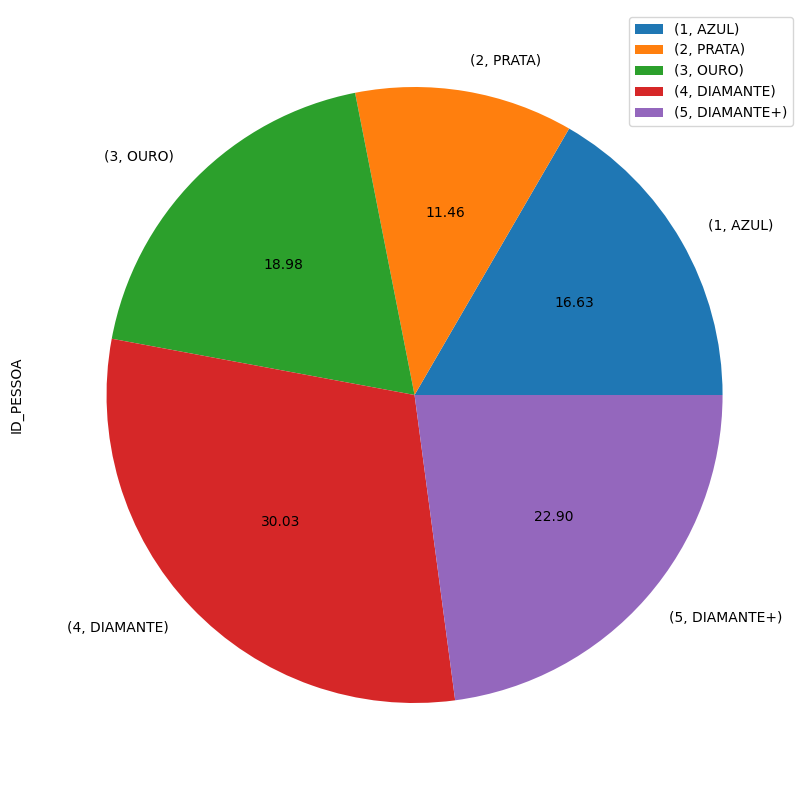

In [24]:
#Porcentagem de Usuarios por nivel
quant_nivel.plot.pie(subplots=True, figsize=(10, 10), autopct="%.2f");


Text(0, 0.5, 'Quant. Credito')

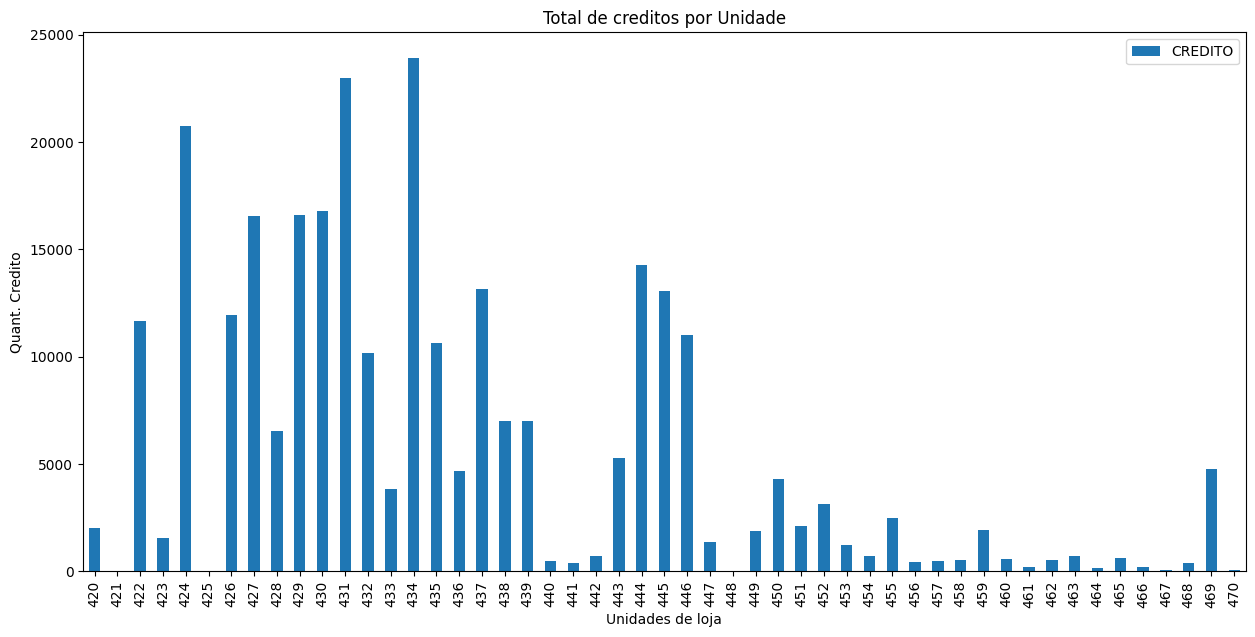

In [45]:
#Grafico de quantidade de transações Credito feitas por loja
from pandas.plotting import parallel_coordinates
data = transacoes_credito
data = data[['UNIDADE','CREDITO']].groupby(['UNIDADE']).count()
plt.rcParams['figure.figsize'] = (15,7)
data.plot(kind = 'bar', label='Credito')
plt.title('Total de creditos por Unidade')
plt.xlabel('Unidades de loja')
plt.ylabel('Quant. Credito')

Text(0, 0.5, 'Media Valor transações')

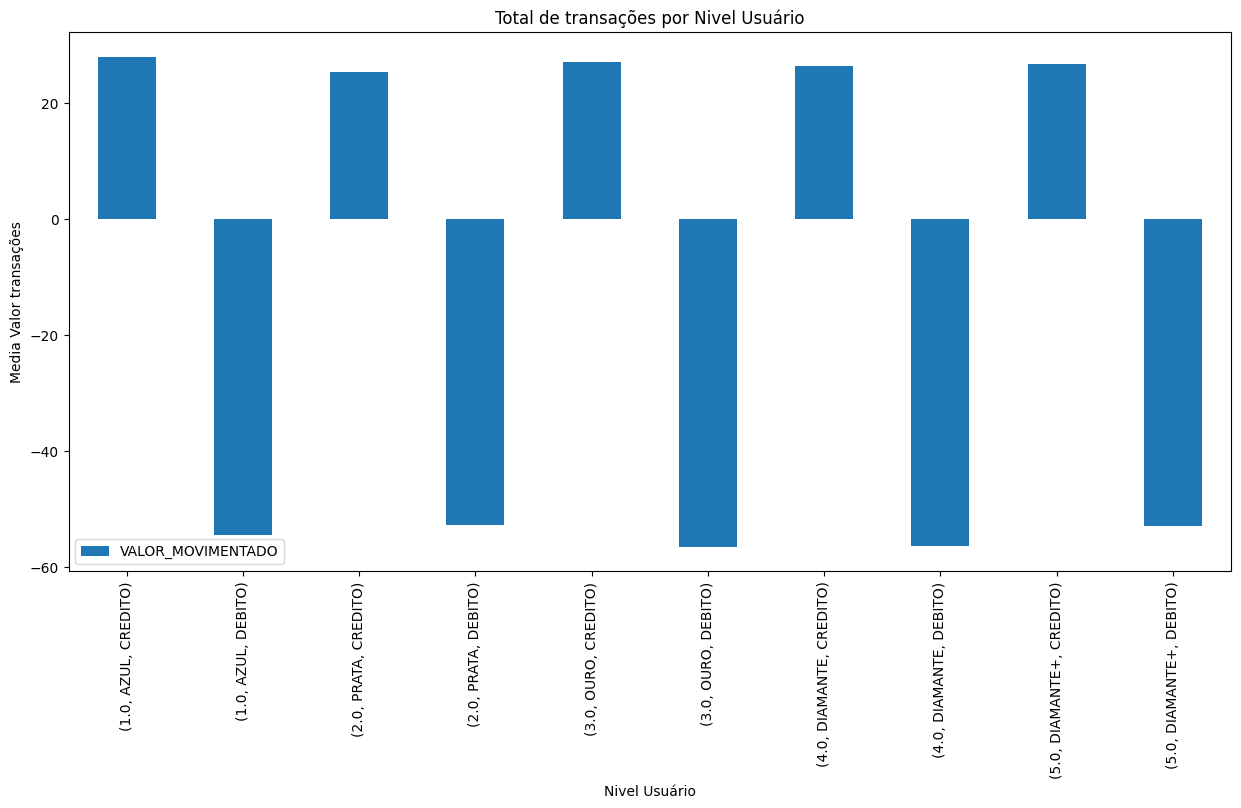

In [43]:
#Visualização dos valores medios de transações realizadas por nivel.
valor_media_nivel_por_transacoes.plot.bar();
plt.title('Total de transações por Nivel Usuário')
plt.xlabel('Nivel Usuário')
plt.ylabel('Media Valor transações')